# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Propósito

El propósito es entender el comportamiento de los usuarios de dos planes diferentes (surf, ultimate) para poder tomar desiciones acerca de marketing, promoción e inversión. El propísito es entender el uso que los usuarios le dan a las llamadas, los mensajes y el uso de los GB para cada data frame.
Se hará un preprocesamiento de cada data frame para observar datos nulos, duplicados y enriquecer los datos.
Se usarán técnicas estadísticas como el promedio, la varianza, el graficado de barras, histogramas y gráfico de cajas para una mejor visualización

## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st

## Cargar datos

In [7]:
# Carga los archivos de datos en diferentes DataFrames
# Conjunto 'users'
df_users = pd.read_csv('megaline_users.csv')
# Conjunto 'calls'
df_calls = pd.read_csv('megaline_calls.csv')
# Conjunto 'messages'
df_messages = pd.read_csv('megaline_messages.csv')
# Conjunto 'internet'
df_internet = pd.read_csv('megaline_internet.csv')
# Conjunto 'plans'
df_plans = pd.read_csv('megaline_plans.csv')


## Preparar los datos

## Tarifas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [17]:
# Imprime una muestra de los datos para las tarifas

print(df_plans)
df_plans.describe()

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Observaciones:

Este data frame cuenta con las características que incluyen dos tipos de planes y los cargos extras al sobrepasar los límites de cada plan. No se encuentra algún problema en los datos, no se ven datos nulos ni duplicados, el tipo de datos de cada columna es correcto, los nombres estan en forma correcta, en conclusion este dataframe no presenta problemas que arreglar o mejorar 

## Corregir datos

Ya que no se encuentran problemas, no hay correcciones necesarias

## Enriquecer los datos

Tapoco se encuentran factores adicioneales que agregar

## Usuarios/as

In [25]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [29]:
# Imprime una muestra de datos para usuarios

print(df_users.head())
df_users.describe()

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Observaciones:

1. Tenemos 500 usuarios enrrolados en alguno de los dos tipos de planes (surf o ultimate).
2. 'reg_date' debería ser de tipo 'datetime'.
3. Hay 466 datos nulos en la columna 'churn_date', son muy pocas personas que no estan enrroladas en algún plan.
4. Se debe observar si hay algun dato duplicado, si existe se debe considerar si eliminarlos.
5. Cambiaremos las letras mayúsculas por minúsculas con str.lower().
6. Cambiaremos los guiones y espacios por guiones bajos con ayuda de replace().
7. Cambiaremos los valores ausentes por 'in_use' con fillna() para un mejor entendimiento de esa columna.
8. Cambiaremos el tipo de datos en 'reg_date' por el tipo 'datetime' mediante to.datetime().

### Corregir los datos

In [33]:
# Revisemos si hay renglones duplicados
print(df_users[df_users.duplicated()])

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [35]:
# Ya que no hay renglones duplicados, reemplazaremos los valores nulos por el valor 'in_use'
df_users['churn_date']=df_users['churn_date'].fillna('in_use')

# Mostramos los datos
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate     in_use  
1  2018-08-13      surf     in_use  
2  2018-10-21      surf     in_use  
3  2018-01-28      surf     in_use  
4  2018-05-23      surf     in_use  


### Enriquecer los datos

In [38]:
# Para facilitar el análisis reemplazaremos a minúsculas todas las letras y los guiones y espacios por guiones bajos
# Cambio por minúsculas de la columna 'first_name'
df_users['first_name']=df_users['first_name'].str.lower()
# Cambio por minúsculas de la columna 'last_name'
df_users['last_name']=df_users['last_name'].str.lower()
# Cambio por minúsculas de la columna 'city' y reemplazo de '-'por '_' 
df_users['city']=df_users['city'].str.lower().str.replace('-','_')
# Reemplazo de ',' en 'city' por '_'
df_users['city']=df_users['city'].str.replace(', ','_')
# Reemplazo de ' ' en 'city' por '_'
df_users['city']=df_users['city'].str.replace(' ','_')
# Cambio de 'reg_date' por un tipo de datos 'datetime'
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
# Mostramos el resultado
print(df_users.head())

   user_id first_name  last_name  age                                  city  \
0     1000   anamaria      bauer   45  atlanta_sandy_springs_roswell_ga_msa   
1     1001     mickey  wilkerson   28        seattle_tacoma_bellevue_wa_msa   
2     1002     carlee    hoffman   36   las_vegas_henderson_paradise_nv_msa   
3     1003   reynaldo    jenkins   52                          tulsa_ok_msa   
4     1004    leonila   thompson   40        seattle_tacoma_bellevue_wa_msa   

    reg_date      plan churn_date  
0 2018-12-24  ultimate     in_use  
1 2018-08-13      surf     in_use  
2 2018-10-21      surf     in_use  
3 2018-01-28      surf     in_use  
4 2018-05-23      surf     in_use  


## Llamadas

In [41]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [45]:
# Imprime una muestra de datos para las llamadas

print(df_calls.head())
df_calls.describe()

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Observaciones:

1. Al parecer hay 137735 llamadas de los 500 usuarios.
2. En este dataframe se tiene la información de las llamadas por usuario, la fecha en la que se hicieron y su duración. 
3. 'call_date' debería ser de tipo 'datetime'.
4. No hay datos nulos que cambiar o eliminar.
5. Se debe observar si hay algun dato duplicado, si existe se debe considerar si eliminarlos.
6. Cambiaremos el tipo de datos en 'call_date' por el tipo 'datetime' mediante to.datetime().
7. Las llamadas con duración "0" podrían ser llamadas realizadas pero que no contestaron o llamadas que contestaron y colgaron muy rápido.

### Corregir los datos

In [50]:
# Observamos su hay duplicados
print(df_calls.groupby('user_id')['duration'].sum())
print(df_calls['id'].duplicated().sum())

user_id
1000     116.83
1001    1640.46
1002     777.13
1003    1041.00
1004    2618.95
         ...   
1495    1666.41
1496    1376.21
1497     276.53
1498    3029.97
1499    1450.31
Name: duration, Length: 481, dtype: float64
0


### Enriquecer los datos

In [53]:
# Cambiamos 'call_date' al tipo datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# Mostramos los datos
print(df_calls.head())

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


## Mensajes

In [55]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [57]:
# Imprime una muestra de datos para los mensajes

print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Observaciones:

1. Al parecer hay 76051 mensajes de los 500 usuarios.
2. En este dataframe se tiene la información de los mensajes por usuario y la fecha en la que se hicieron. 
3. 'message_date' debería ser de tipo 'datetime'.
4. No hay datos nulos que cambiar o eliminar.
5. Se debe observar si hay algun dato duplicado, si existe se debe considerar si eliminarlos.
6. Cambiaremos el tipo de datos en 'message_date' por el tipo 'datetime' mediante to.datetime().

### Corregir los datos

In [61]:
# Calculamos cuantos duplicados hay

print(df_calls['id'].duplicated().sum())

0


### Enriquecer los datos

In [64]:
# Cambiamos 'message_date' al tipo de dato datatime

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

# Mostramos los datos
print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


## Internet

In [67]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [69]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Observaciones:

1. Al parecer hay 104825 sesiones de uso de datos de los 500 usuarios.
2. En este dataframe se tiene la información de las sesiones en internet por usuario, la fecha en la que se hicieron y las mb que se utilizaron. 
3. 'session_date' debería ser de tipo 'datetime'.
4. No hay datos nulos que cambiar o eliminar.
5. Se debe observar si hay algun dato duplicado, si existe se debe considerar si eliminarlos.
6. Cambiaremos el tipo de datos en 'session_date' por el tipo 'datetime' mediante to.datetime().

### Corregir los datos

In [73]:
# Calculamos cuantos duplicados hay

print(df_internet['id'].duplicated().sum())

0


### Enriquecer los datos

In [76]:
# Cambiamos 'session_date' al tipo de dato datatime

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# Mostramos los datos
print(df_internet)

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


Nota:

Cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  


## Estudiar las condiciones de las tarifas

In [80]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
surf_plan=df_plans.iloc[0,0:4]
surf_plus=df_plans.iloc[0,4:7]
ultimate_plan=df_plans.iloc[1,0:4]
ultimate_plus=df_plans.iloc[1,4:7]

# Mostramos los datos
print('The features of the SURF plan are:\n')
print(surf_plan)
print('\n')
print('Prices for SURF limited exceeded:\n')
print(surf_plus)
print('\n')
print('The features of the ULTIMATE plan are:\n')
print(ultimate_plan)
print('\n')
print('Prices for ULTIMATE limited exceeded:\n')
print(ultimate_plus)

The features of the SURF plan are:

messages_included           50
mb_per_month_included    15360
minutes_included           500
usd_monthly_pay             20
Name: 0, dtype: object


Prices for SURF limited exceeded:

usd_per_gb           10
usd_per_message    0.03
usd_per_minute     0.03
Name: 0, dtype: object


The features of the ULTIMATE plan are:

messages_included         1000
mb_per_month_included    30720
minutes_included          3000
usd_monthly_pay             70
Name: 1, dtype: object


Prices for ULTIMATE limited exceeded:

usd_per_gb            7
usd_per_message    0.01
usd_per_minute     0.01
Name: 1, dtype: object


## Agregar datos por usuario

user_id  month
1000     12       16
1001     10       65
         11       64
         12       56
         9        49
                  ..
1498     5        35
1499     12       65
         10       53
         11       45
         9        41
Name: count, Length: 2258, dtype: int64

For example: for user "1001" we can see the calls per month as follows:

user_id  month
1001     8        27
         9        49
         10       65
         11       64
         12       56
Name: count, dtype: int64


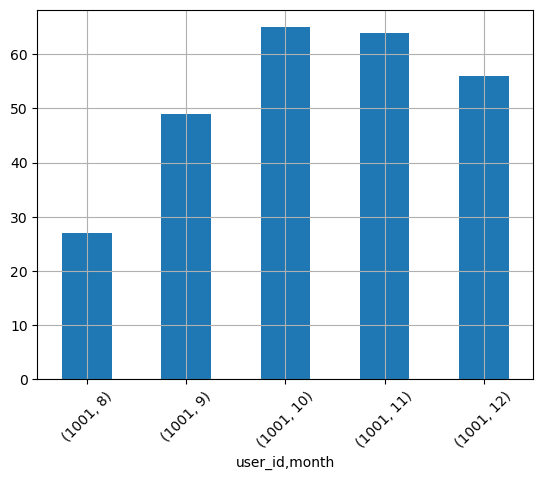

In [83]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['month'] = df_calls['call_date'].dt.month
num_calls_per_month = df_calls.groupby('user_id')['month'].value_counts()

# Mostramos los datos
print(num_calls_per_month)

# Graficamos como ejemplo al usuario 1001
example1 = num_calls_per_month.iloc[1:6].sort_index()
print('')
print('For example: for user "1001" we can see the calls per month as follows:\n')
print(example1)
ax1 = example1.plot.bar(x=example1, y=example1, rot=45, grid = True)

user_id  month
1000     12       116.83
1001     8        171.14
         9        297.69
         10       374.11
         11       404.59
                   ...  
1498     12       324.77
1499     9        330.37
         10       363.28
         11       288.56
         12       468.10
Name: duration, Length: 2258, dtype: float64

For example: for user "1001" we can see the minutes of calls per month as follows:

user_id  month
1001     8        171.14
         9        297.69
         10       374.11
         11       404.59
         12       392.93
Name: duration, dtype: float64


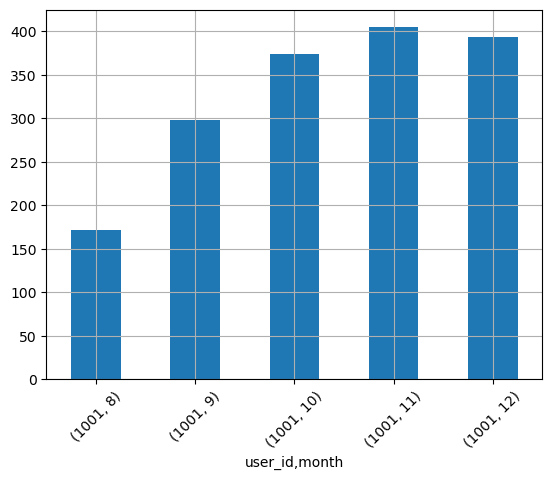

In [85]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_month = df_calls.groupby(['user_id', 'month'])['duration'].sum()
# También puede usarse: pivot_calls = calls.pivot_table(index=['user_id', 'month'],
#                            values=['duration'],
#                            aggfunc=['sum','count']).reset_index()

# Mostramos los datos
print(minutes_per_month)

# Graficamos como ejemplo al usuario 1001
example2 = minutes_per_month.iloc[1:6].sort_index()
print('')
print('For example: for user "1001" we can see the minutes of calls per month as follows:\n')
print(example2)
ax2 = example2.plot.bar(x=example2, y=example2, rot=45, grid = True)

user_id  month
1000     12       11
1001     10       53
         9        44
         12       44
         11       36
                  ..
1496     10       18
         11       13
         12       11
         8         2
1497     12       50
Name: month, Length: 1806, dtype: int64

For example: for user "1001" we can see the messages per month as follows:

user_id  month
1001     8        30
         9        44
         10       53
         11       36
         12       44
Name: month, dtype: int64


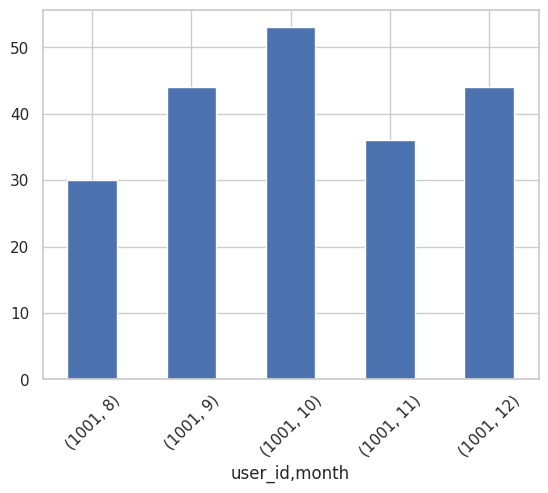

In [75]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

df_messages['month'] = df_messages['message_date'].dt.month
num_messages_per_month = df_messages.groupby('user_id')['month'].value_counts()

# Mostramos los datos
print(num_messages_per_month)

# Graficamos como ejemplo al usuario 1001
example3 = num_messages_per_month.iloc[1:6].sort_index()
print('')
print('For example: for user "1001" we can see the messages per month as follows:\n')
print(example3)
ax3 = example3.plot.bar(x=example3, y=example3, rot=45, grid = True)

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64

For example: for user "1001" we can see the MB per month as follows:

user_id  month
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
         12       19369.18
Name: mb_used, dtype: float64


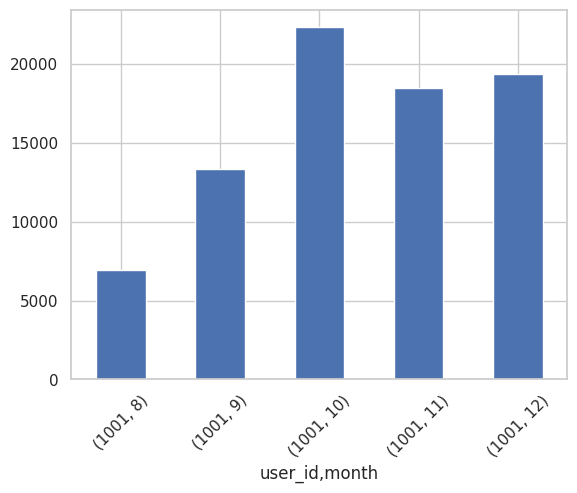

In [76]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_internet['month'] = df_internet['session_date'].dt.month
vol_mb_per_month = df_internet.groupby(['user_id', 'month'])['mb_used'].sum()

# Mostramos los datos
print(vol_mb_per_month)

# Graficamos como ejemplo al usuario 1001
example4 = vol_mb_per_month.iloc[1:6].sort_index()
print('')
print('For example: for user "1001" we can see the MB per month as follows:\n')
print(example4)
ax4 = example4.plot.bar(x=example4, y=example4, rot=45, grid = True)

In [77]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_user_per_month = pd.concat([num_calls_per_month, minutes_per_month, num_messages_per_month, vol_mb_per_month], axis='columns')
df_user_per_month.columns=['num_calls', 'minutes', 'num_messages', 'vol_mb']

# Mostramos los datos
print(df_user_per_month.head())

               num_calls  minutes  num_messages    vol_mb
user_id month                                            
1000    12          16.0   116.83          11.0   1901.47
1001    8           27.0   171.14          30.0   6919.15
        9           49.0   297.69          44.0  13314.82
        10          65.0   374.11          53.0  22330.49
        11          64.0   404.59          36.0  18504.30


In [78]:
# Mostramos la información en el dataframe y una muestra de los datos
df_user_per_month.info()
print(df_user_per_month.shape)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (1000, 12) to (1499, 12)
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_calls     2258 non-null   float64
 1   minutes       2258 non-null   float64
 2   num_messages  1806 non-null   float64
 3   vol_mb        2277 non-null   float64
dtypes: float64(4)
memory usage: 98.9 KB
(2293, 4)


In [79]:
# Ya que hay datos nulos los rellenaremos con '0'
df_user_per_month = df_user_per_month.fillna(0)

# Por seguir el protocolo se cambian los datos enteros a tipo 'int'
df_user_per_month['num_calls'] = df_user_per_month['num_calls'].astype('int')
df_user_per_month['num_messages'] = df_user_per_month['num_messages'].astype('int')

# Mostramos los datos
print(df_user_per_month.head())
df_user_per_month.info()

               num_calls  minutes  num_messages    vol_mb
user_id month                                            
1000    12            16   116.83            11   1901.47
1001    8             27   171.14            30   6919.15
        9             49   297.69            44  13314.82
        10            65   374.11            53  22330.49
        11            64   404.59            36  18504.30
...                  ...      ...           ...       ...
1498    12            39   324.77             0  23137.69
1499    9             41   330.37             0  12984.76
        10            53   363.28             0  19492.43
        11            45   288.56             0  16813.83
        12            65   468.10             0  22059.21

[2293 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (1000, 12) to (1499, 12)
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_calls

In [80]:
# Añade la información de la tarifa 

# Primero agregamos la información al dataframe 'df_user_per_month'
df_user_per_month = df_user_per_month.reset_index()
df_user_per_month = df_user_per_month.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

# Mostramos los resultados
print(df_user_per_month.head())

# Ahora agregamos la información de la tarifa a los demás dataframes
df_calls = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_messages = df_messages.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_internet = df_internet.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

   user_id  month  num_calls  minutes  num_messages    vol_mb      plan
0     1000     12         16   116.83            11   1901.47  ultimate
1     1001      8         27   171.14            30   6919.15      surf
2     1001      9         49   297.69            44  13314.82      surf
3     1001     10         65   374.11            53  22330.49      surf
4     1001     11         64   404.59            36  18504.30      surf


In [81]:
# Creamos una funsión para calcular los ingresos mensuales
def calculate_monthly_revenue(row):
    plan=df_plans[df_plans['plan_name']==row['plan']].iloc[0]
    
    # Ingresos mensuales por llamadas
    extra_minutes = max(0, row['minutes'] - plan['minutes_included'])
    revenue_calls = extra_minutes * plan['usd_per_minute']
    
    # Ingresos mensuales por mensajes
    extra_messages = max(0, row['num_messages'] - plan['messages_included'])
    revenue_messages = extra_messages * plan['usd_per_message']
    
    # Ingresos mensuales por datos
    extra_gb = max(0, np.ceil(row['vol_mb'] / 1024) -np.ceil(plan['mb_per_month_included'] / 1024))
    revenue_data = extra_gb * plan['usd_per_gb']
    
    # Ingreso mensual total
    total_revenue = plan['usd_monthly_pay'] + revenue_calls + revenue_messages + revenue_data
    
    return total_revenue

# Aplicar la función a cada fila del DataFrame
df_user_per_month['revenue'] = df_user_per_month.apply(calculate_monthly_revenue,axis=1)

# Mostramos los resultados
print(df_user_per_month.head())
# imprimimos los planes para comparar
print(df_plans)

      user_id  month  num_calls  minutes  num_messages    vol_mb      plan  \
0        1000     12         16   116.83            11   1901.47  ultimate   
1        1001      8         27   171.14            30   6919.15      surf   
2        1001      9         49   297.69            44  13314.82      surf   
3        1001     10         65   374.11            53  22330.49      surf   
4        1001     11         64   404.59            36  18504.30      surf   
...       ...    ...        ...      ...           ...       ...       ...   
2288     1498     12         39   324.77             0  23137.69      surf   
2289     1499      9         41   330.37             0  12984.76      surf   
2290     1499     10         53   363.28             0  19492.43      surf   
2291     1499     11         45   288.56             0  16813.83      surf   
2292     1499     12         65   468.10             0  22059.21      surf   

      revenue  
0       70.00  
1       20.00  
2       20.00  

## Estudia el comportamiento de usuario

### Llamadas

        plan  month  duration
0       surf      1  6.428000
1       surf      2  6.906175
2       surf      3  6.696919
3       surf      4  6.799918
4       surf      5  6.769200
5       surf      6  6.846812
6       surf      7  6.721710
7       surf      8  6.726164
8       surf      9  6.728684
9       surf     10  6.722302
10      surf     11  6.759115
11      surf     12  6.836607
12  ultimate      1  6.541518
13  ultimate      2  6.517230
14  ultimate      3  6.210906
15  ultimate      4  6.659990
16  ultimate      5  6.662443
17  ultimate      6  6.705188
18  ultimate      7  6.879085
19  ultimate      8  6.613484
20  ultimate      9  6.770040
21  ultimate     10  6.665850
22  ultimate     11  6.742506
23  ultimate     12  6.671929


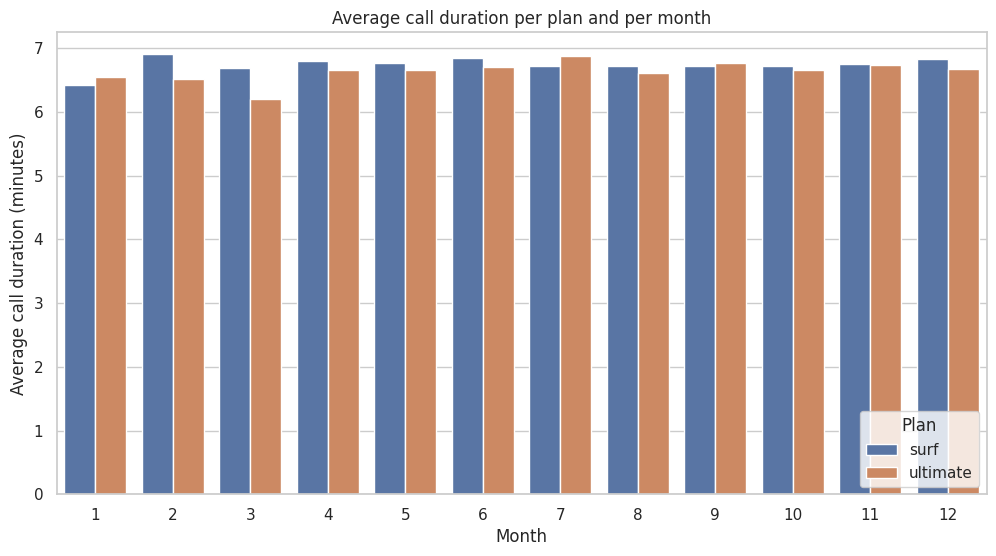

In [82]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Calcula la duración promedio de llamadas por plan y por mes
average_call_duration = df_calls.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Mostramos los 24 resultados
print(average_call_duration.head(24))

import seaborn as sns
# Se configura el estilo
sns.set(style="whitegrid")

# Se crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=average_call_duration, x='month', y='duration', hue='plan')

# Personalización
plt.title('Average call duration per plan and per month')
plt.xlabel('Month')
plt.ylabel('Average call duration (minutes)')
plt.legend(title='Plan',loc='lower right')

# Mostrar el gráfico
plt.show()

   user_id      plan  month  duration
0     1000  ultimate     12    116.83
1     1001      surf      8    171.14
2     1001      surf      9    297.69
3     1001      surf     10    374.11
4     1001      surf     11    404.59


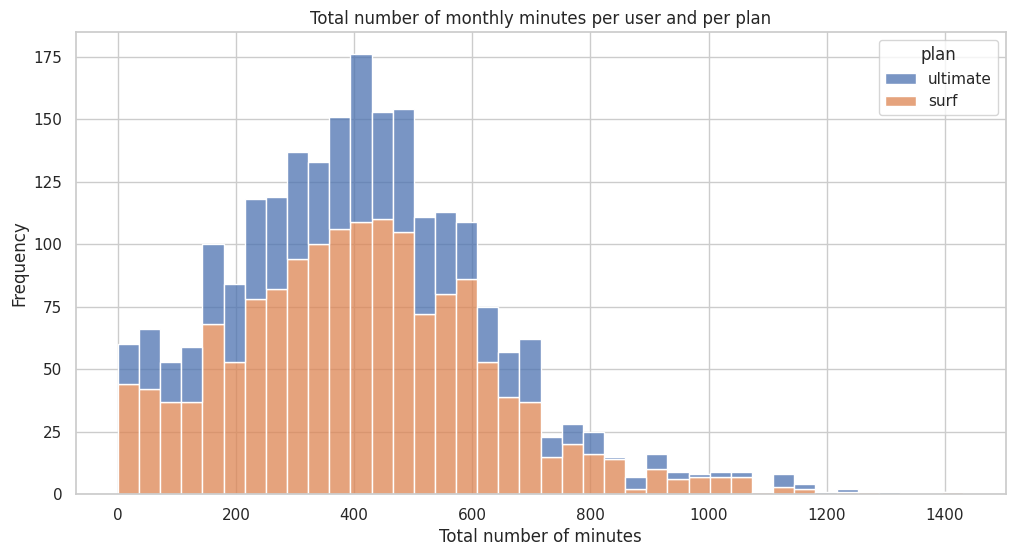

In [83]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Calcula el número total de minutos mensuales por usuario y por plan
total_minutes_per_month = df_calls.groupby(['user_id', 'plan', 'month'])['duration'].sum().reset_index()

# Mostramos los resultados
print(total_minutes_per_month.head())

# Se crea el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=total_minutes_per_month, x='duration', hue='plan', multiple='stack', bins=40, legend=['surf', 'ultimate'])

# Personalización del gráfico
plt.title('Total number of monthly minutes per user and per plan')
plt.xlabel('Total number of minutes')
plt.ylabel('Frequency')
plt.legend

# Mostrar el gráfico
plt.show()

In [84]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Calcula la media de la duración mensual de llamadas
mean_duration = total_minutes_per_month['duration'].mean()

# Calcula la varianza de la duración mensual de llamadas
variance_duration = total_minutes_per_month['duration'].var()

# Mostrar los resultados
print(f"Average monthly call duration: {mean_duration:.2f} minutes")
print(f"Variance of monthly call duration: {variance_duration:.2f} square minutes")

Average monthly call duration: 411.49 minutes
Variance of monthly call duration: 48088.30 square minutes


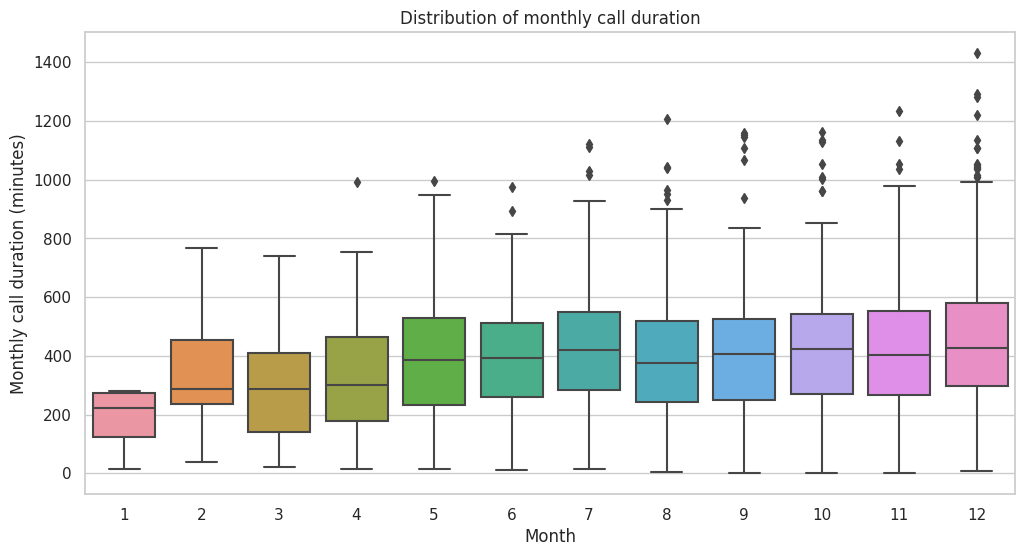

In [85]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Crea el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='duration', data=total_minutes_per_month)

# Personalización del gráfico
plt.title('Distribution of monthly call duration')
plt.xlabel('Month')
plt.ylabel('Monthly call duration (minutes)')

# Mostrar el gráfico
plt.show()

Observaciones:

1. El promedio de las llamadas por plan y por mes no varía significativamente de mes a mes, las mayores difrencias por plan se ven en febrero y marzo.
2. En alrededor de 425 minutos al mes encontramos la mayor frecuencia, por lo que al mes la mayoría de los usuarios consumen aproximadamente 425 minutos en llamadas, así que la mayoria usando el plan 'surf' es suficiente para las llamadas
3. La mayor varianza se encuentra en los meses de marzo, noviembre y diciembre debido tal vez a las fiestas que se celebran en estos meses.
4. El mes de enero es el de menos varianza y el de menor duracion en llamadas promedio.
5. Desde el mes de abril comienzan a haber valores atípicos pero la mayor cantidad de estos se encuentra en diciembre

### Mensajes

   user_id      plan  month  num_messages
0     1000  ultimate     12            11
1     1001      surf      8            30
2     1001      surf      9            44
3     1001      surf     10            53
4     1001      surf     11            36


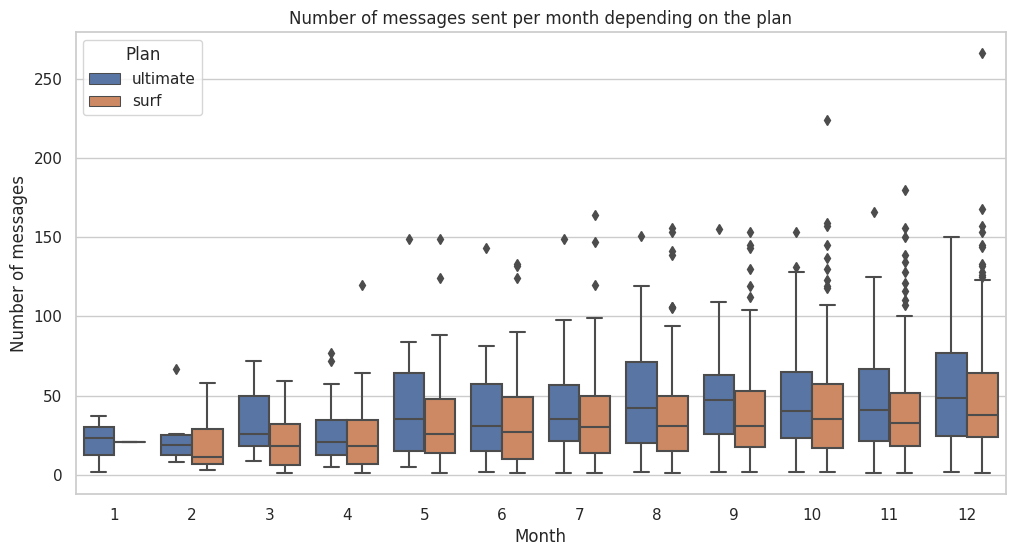

In [86]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Calcula la duración promedio de llamadas por plan y por mes
total_messages_per_month = df_messages.groupby(['user_id', 'plan', 'month'])['id'].count().reset_index()

# Renombra la columna 'id' a 'num_messages'
total_messages_per_month = total_messages_per_month.rename(columns={'id': 'num_messages'})

# Mostramos los resultados
print(total_messages_per_month.head())

# Se crea el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='num_messages', hue='plan', data=total_messages_per_month)

# Personalización del gráfico
plt.title('Number of messages sent per month depending on the plan')
plt.xlabel('Month')
plt.ylabel('Number of messages')
plt.legend(title='Plan')

# Mostrar el gráfico
plt.show()

In [87]:
# Calcular la cantidad promedio de mensajes por mes para cada plan
average_messages_per_month = total_messages_per_month.groupby(['plan', 'month'])['num_messages'].mean().reset_index()

# Mostramos los resultados
print(average_messages_per_month.head())

   plan  month  num_messages
0  surf      1     21.000000
1  surf      2     21.600000
2  surf      3     21.937500
3  surf      4     24.166667
4  surf      5     33.017857


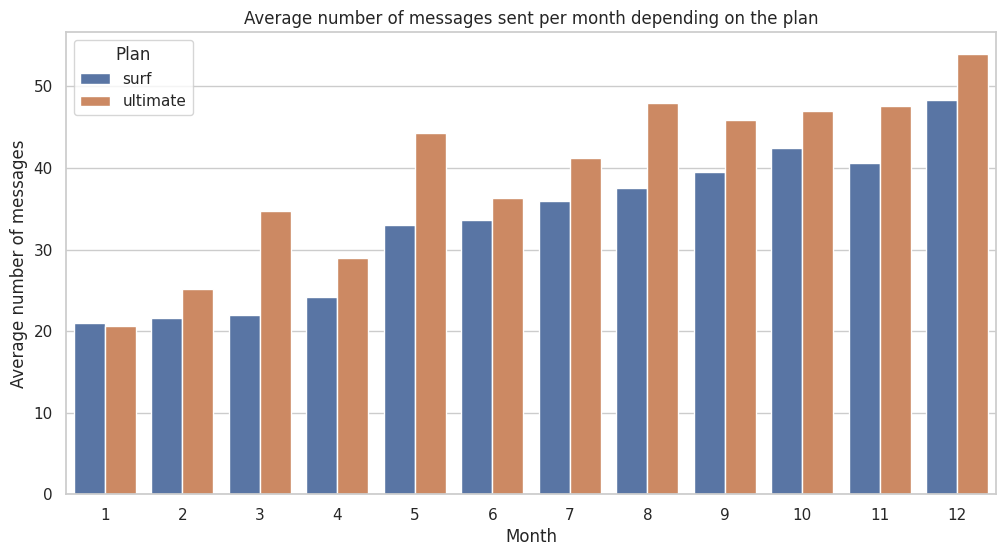

In [88]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='num_messages', hue='plan', data=average_messages_per_month)

# Personalización del gráfico
plt.title('Average number of messages sent per month depending on the plan')
plt.xlabel('Month')
plt.ylabel('Average number of messages')
plt.legend(title='Plan')

# Mostrar el gráfico
plt.show()

In [89]:
# Calcular la media de la duración mensual de llamadas
mean_messages = total_messages_per_month['num_messages'].mean()

# Calcula la varianza de la duración mensual de llamadas
variance_messages = total_messages_per_month['num_messages'].var()

# Mostrar los resultados
print(f"Average monthly messages: {mean_messages:.2f} messages")
print(f"Variance of monthly messages: {variance_messages:.2f} square messages")

Average monthly messages: 42.11 messages
Variance of monthly messages: 1097.13 square messages


Observaciones:

1. El promedio de mensajes por mes aumenta en los meses de mayo, noviembre y diciembre, una vez más, una posibilidad podrían ser las fiestas de esos meses.
2. Para el promedio se puede ver una diferencia mayor por plan, en los meses de marzo y mayo, donde los usuarios del plan ultimate hacen más uso de los mensajes en promedio
3. El promedio de los mensajes por mes no pasa de los 50 mensajes para la mayoria
4. Parece ser que la mayoría de los usuarios del plan surf tienden a excederse de los mensajes incluidos y los usuarios de plan ultimate no alcanzan el número de mensajes incluidos.
5. El mes de febrero es el que presenta menos varianza para el plan ultimate y el de enero para surf
6. En promedio, en enero se mandan menos mensajess

### Internet

In [90]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Calcula el tráfico total de Internet mensual por usuario y por plan
total_internet_per_month = df_internet.groupby(['user_id', 'plan', 'month'])['mb_used'].sum().reset_index()

# Convertir los MB a GB
total_internet_per_month['gb_used'] = total_internet_per_month['mb_used'] / 1024

# Mostramos los resultados
print(total_internet_per_month.head())

   user_id      plan  month   mb_used    gb_used
0     1000  ultimate     12   1901.47   1.856904
1     1001      surf      8   6919.15   6.756982
2     1001      surf      9  13314.82  13.002754
3     1001      surf     10  22330.49  21.807119
4     1001      surf     11  18504.30  18.070605


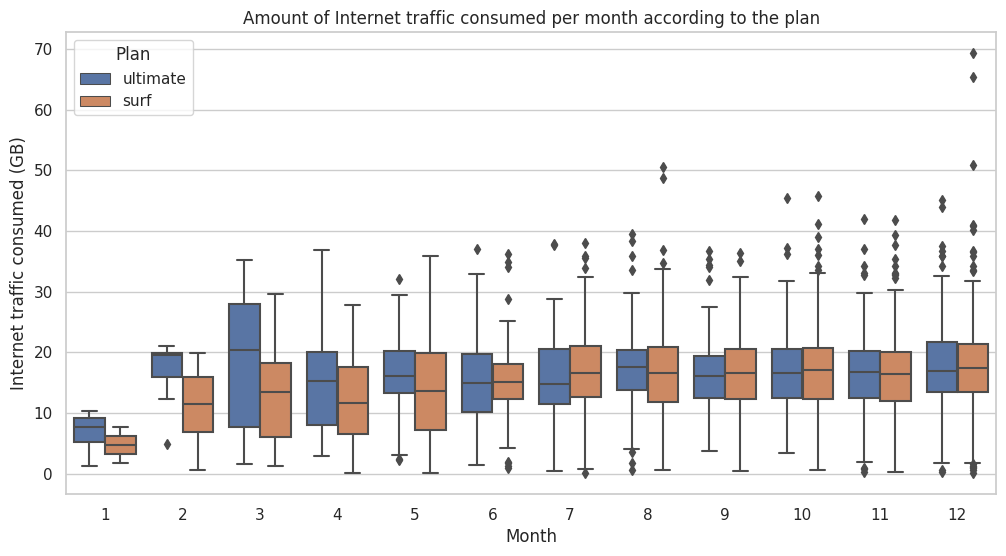

In [91]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='gb_used', hue='plan', data=total_internet_per_month)

# Personalización del gráfico
plt.title('Amount of Internet traffic consumed per month according to the plan')
plt.xlabel('Month')
plt.ylabel('Internet traffic consumed (GB)')
plt.legend(title='Plan')

# Mostramos el gráfico
plt.show()

   plan  month    gb_used
0  surf      1   4.760605
1  surf      2  11.893402
2  surf      3  13.032656
3  surf      4  11.942167
4  surf      5  13.788797


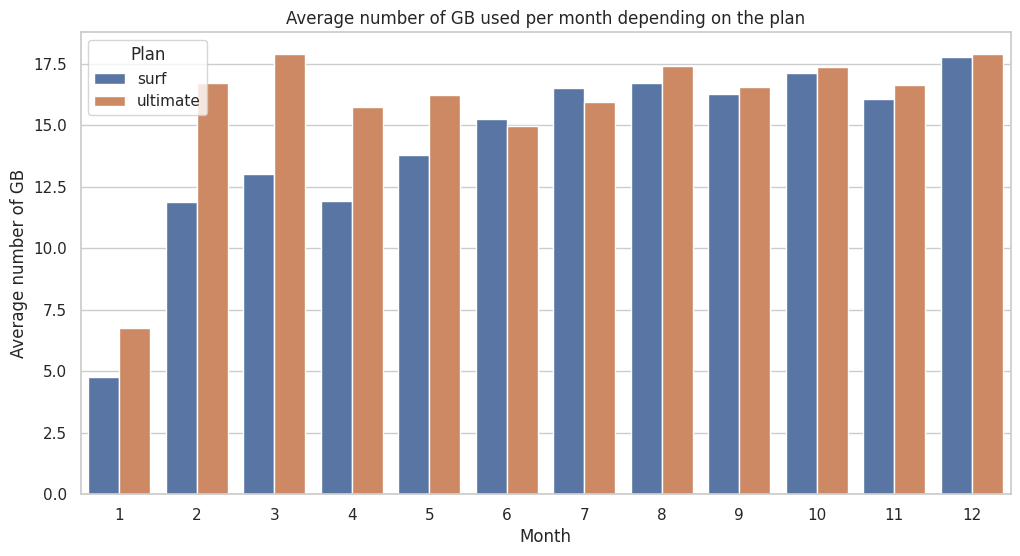

In [92]:
# Calcular la cantidad promedio de mensajes por mes para cada plan
average_gb_per_month = total_internet_per_month.groupby(['plan', 'month'])['gb_used'].mean().reset_index()

# Mostramos los resultados
print(average_gb_per_month.head())

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='gb_used', hue='plan', data=average_gb_per_month)

# Personalización del gráfico
plt.title('Average number of GB used per month depending on the plan')
plt.xlabel('Month')
plt.ylabel('Average number of GB')
plt.legend(title='Plan')

# Mostramos el gráfico
plt.show()

In [93]:
# Calcular la media de la duración mensual de llamadas
mean_gb = total_internet_per_month['gb_used'].mean()

# Calcular la varianza de la duración mensual de llamadas
variance_gb = total_internet_per_month['gb_used'].var()

# Mostrar los resultados
print(f"Average monthly messages: {mean_gb:.2f} messages")
print(f"Variance of monthly messages: {variance_gb:.2f} square messages")

Average monthly messages: 16.49 messages
Variance of monthly messages: 59.06 square messages


Observaciones:

1. El promedio de uso de datos por mes alcanza máximos en los meses de marzo y diciembre para el plan ultimate y el diciembre y octubre para el plan surf.
2. El menor promedio para ambos planes esta en enero.
3. En promedio ninguno de los 2 planes revasa por mucho los 17.5 GB de consumo
4. En promedio a partir de junio el plan surf empieza a revazar sus GB incluidos.
5. En promedio el plan ultimate no revaza sus GB incluidos.
6. Por la gráfica de cajas podemos decir que pocas personas revazan los 30 GB de consumo.
7. La mayor varianza para el plan ultimate se encuentra en abril y para el plan surf en mayo

## Ingreso

In [94]:
# Calcular estadísticas descriptivas por plan
revenue_stats = df_user_per_month.groupby('plan')['revenue'].describe()

# Ver los resultados
print(revenue_stats)

           count       mean        std   min   25%    50%   75%       max
plan                                                                     
surf      1573.0  60.327346  55.262605  20.0  20.0  40.15  80.0  588.6372
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.0  182.0000


In [99]:
income_per_plan = df_user_per_month.groupby('plan')['revenue'].sum()
print(income_per_plan)

plan
surf        94894.9156
ultimate    52066.0000
Name: revenue, dtype: float64


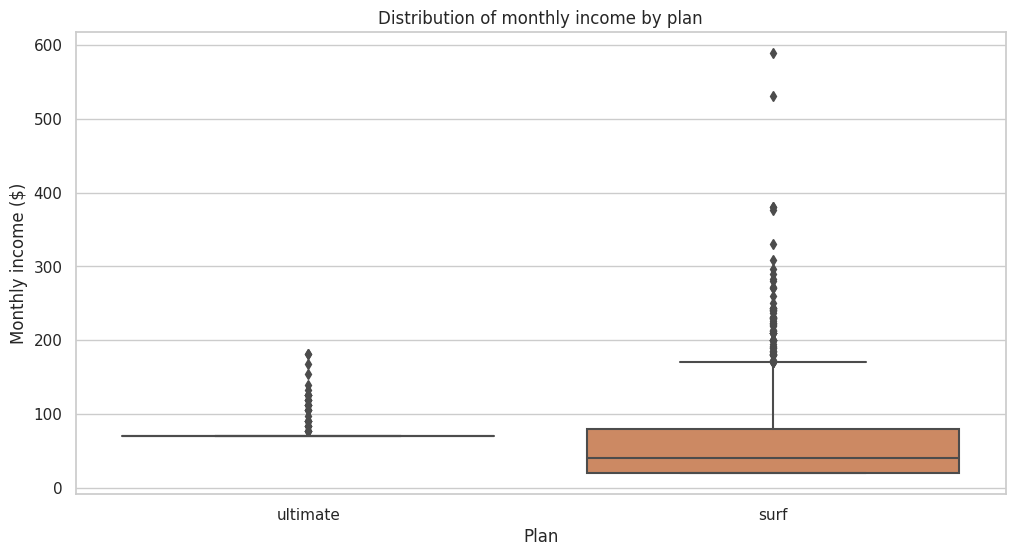

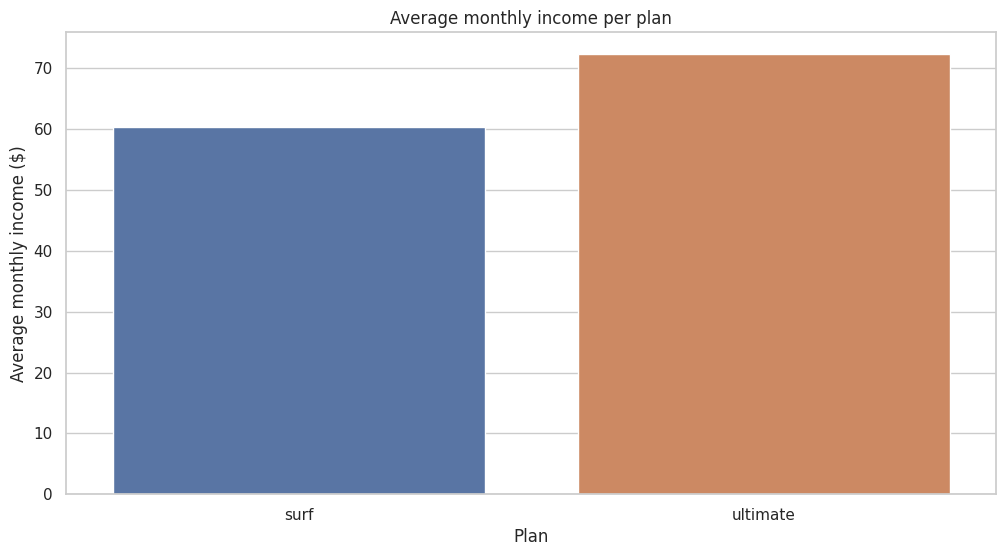

In [95]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='revenue', data=df_user_per_month)

# Personalizar el gráfico
plt.title('Distribution of monthly income by plan')
plt.xlabel('Plan')
plt.ylabel('Monthly income ($)')
plt.show()

# Crear el gráfico de barras para la media de los ingresos mensuales por plan
average_revenue_per_plan = df_user_per_month.groupby('plan')['revenue'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='plan', y='revenue', data=average_revenue_per_plan)

# Personalizar el gráfico
plt.title('Average monthly income per plan')
plt.xlabel('Plan')
plt.ylabel('Average monthly income ($)')
plt.show()

Observaciones:

1. Aunque la diferencia entre ambos planes comienza con 50 dolares, resulta que en promedio los usuarios terminan pagando sólo 11 o 12 dolares menos contratando el plan surf del plan ultimate.
2. En el plan ultimate pocas personas exceden los límites de su plan
3. La varianza en el plan ultimate es muy pequeña y esta alrededor de los 70 dolares, por lo que podemos decir que efectivamente pocas personas revasan el límite.
4. En cambio, la varianza en el plan surf es más grande con valores atípicos incluso mayores que en el plan ultimate
5. En promedio la gente gasta 40 dolares más por el plan surf

## Prueba las hipótesis estadísticas

In [96]:
# Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

# Extraer los ingresos de los usuarios de cada plan
revenue_ultimate = df_user_per_month[df_user_per_month['plan'] == 'ultimate']['revenue']
revenue_surf = df_user_per_month[df_user_per_month['plan'] == 'surf']['revenue']

# Realizar la prueba t para muestras independientes
t_stat, p_value = st.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

# Imprimir los resultados
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Evaluar la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.")
else:
    print("No podemos rechazar la hipótesis nula: no hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.")

T-statistic: 8.228840784742438
P-value: 3.5320199509520717e-16
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.


In [97]:
df_user_per_month = df_user_per_month.merge(df_users[['user_id', 'city']], on='user_id', how='left')

In [98]:
# Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

# Definir área NY-NJ
ny_nj_areas = ['new_york_newark_jersey_city_ny_nj_pa_msa']

# Extraer los ingresos de los usuarios del área NY-NJ y de otras regiones
revenue_ny_nj = df_user_per_month[df_user_per_month['city'].isin(ny_nj_areas)]['revenue']
revenue_other_areas = df_user_per_month[~df_user_per_month['city'].isin(ny_nj_areas)]['revenue']

# Realizar la prueba t para muestras independientes
t_stat, p_value = st.ttest_ind(revenue_ny_nj, revenue_other_areas, equal_var=False)

# Imprimir los resultados
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Evaluar la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: no hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y otras regiones.")

T-statistic: -2.1597353056435127
P-value: 0.031214139070912725
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y otras regiones.


## Conclusión general

Varias cosas se fueron concluyendo al rededor del análisis pero lo más importante es lo siguiente:

1. En las llamadas, aproximadamente 425 son los minutos por usuario al mes que más se ocupan, al parecer no se exceden los minutos del plan ultimate y son pocos los que exceden los 500 minutos del plan surf comporados con los que gastan menos de 500 minutos.
2. En promedio las llamadas duran entre 6 y 7 minutos.
3. La mayor varianza de las llamadas se encuentra en los meses de mayo, noviembre y diciembre que supongo es por las fechas y fiestas en familia.
4. Para los mensajes nadie excede los minutos del plan ultimate y en cambio varios usuarios del plan surf si exceden esos mensajes y en este plan tambien se encuentra la mayor cantidad de valores atípicos
5. En diciembre es cuando más se envían mensajes en promedio
6. Para el uso de GB encontramos que sí se exceden los límites de consumo para ambos planes; sin embargo, hay más excedentes en el plan surf por un rango mucho más amplio.
7. No hay muchas diferencias en el consmuno de GB por plan, solo en enero que es cuando menos se consume para ambos planes.
8. A partir de junio, en promedio, se superan los 15 GB de uso.
9. En promedio, se pagan aproximadamente 60 dolares para el plan surf y 72 para el plan ultimate, aproximadamente 12 dolares diferencia entre planes.
10. La mayor parte de los usuarios del plan surf sobrepasan el cargo por mes de su plan y son los que tienen valores atípicos más elevados, llegando a casi los 600 dolares de pago y donde más se exceden es en el uso de GB.
11. La mayoría de usuarios del plan ultimate no exceden o exceden por muy poco su plan.
12. Enero es el mes con menor uso de minutos, mensajes y uso de GB y noviembre y diciembre el de mayor uso en general
13. Al parecer hay una diferencia entre los ingresos promedio entre los usuarios de los planes Ultimate y Surf.
14. Hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y otras regiones.
15. Segun el análisis el plan surf es el plan que más genera ingresos con 94894.91 dolares, en cambio el plan ultimate genera 52066 dolares, aunque es un plan más barato, parece que los usuarios generan más ingresos gracias a que exceden en mayor medida y más a menudo los límites. Para decir esto de manera contundente habría que saber cuanto cuesta el proveer cada plan al cliente, el marketing, la distribución, etc. y restarlo del ingreso que genera; sin embargo, es evidente en este análisis que el plan surf genera más dinero por año.